In [16]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Read data into pandas dataframe
kick_data = pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter002.csv")
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter003.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter004.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter005.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter006.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter007.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter008.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter009.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter010.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter011.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter012.csv"))

In [19]:
# Isolate relevant attributes
kick_data = kick_data.loc[:, ['backers_count','blurb','category','country', 'goal', 
                              'staff_pick', 'state', 'usd_pledged']]
kick_data.head()

,backers_count,blurb,category,country,goal,staff_pick,state,usd_pledged
0,32,Drinking Card Games are normal playing cards w...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",US,1600.0,False,failed,563.00000
1,6509,Aliens! Mutants! Weird science! Gather your He...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",US,100000.0,True,successful,911937.00000
2,0,A virtual application that allows you to be at...,"{""id"":332,""name"":""Apps"",""slug"":""technology/app...",US,50000.0,False,failed,0.00000
3,19,We're dusting off the vintage radio and giving...,"{""id"":339,""name"":""Sound"",""slug"":""technology/so...",AU,2000.0,False,successful,3223.97705
4,4,I'm a young mechanic that is fixing cars for l...,"{""id"":25,""name"":""Sculpture"",""slug"":""art/sculpt...",US,1000.0,False,failed,161.00000


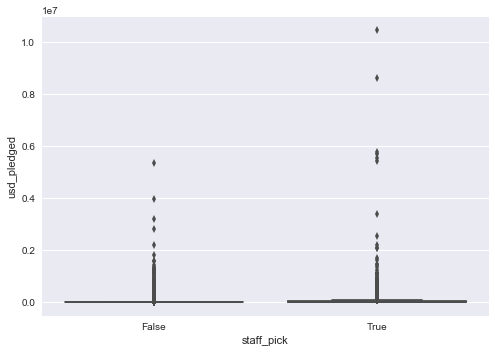

In [21]:
# Construct seaborn boxplot to see how being a staff pick affects how much is pledged
sns.boxplot(x="staff_pick", y="usd_pledged", data=kick_data)

# Show plot
plt.show()

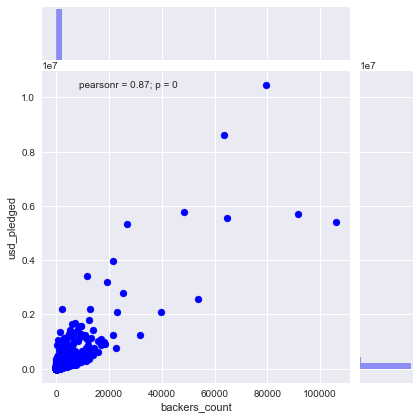

In [23]:
# Construct seaborn jointplot
sns.jointplot(data=kick_data, x='backers_count', y='usd_pledged', color='b')

# Show plot
plt.show()

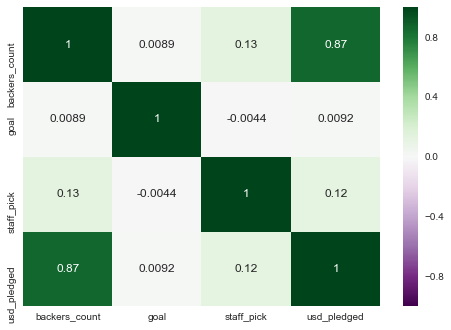

In [25]:
# Construct seaborn heatmap to get correlations between attributes
sns.heatmap(kick_data.corr(), annot=True, cmap='PRGn')

# Show plot
plt.show()

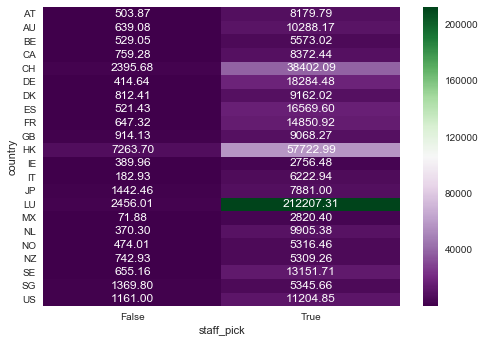

In [27]:
# Construct heatmap to show median value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', values='usd_pledged', aggfunc=np.median)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")

# Show plot
plt.show()

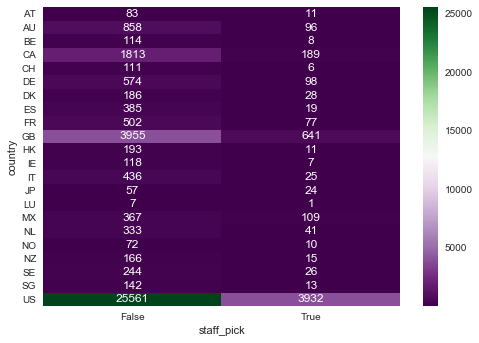

In [28]:
# Count how many entries per country based on staff_pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', aggfunc='size')
sns.heatmap(kick_pt, annot=True, fmt=".0f", cmap = "PRGn")

# Show plot
plt.show()